In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
from scipy.optimize import fsolve

from matplotlib import rcParams
# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

## Coursework 1A 

- Implementating RK2 family of methods
- verification test to confirm validity at $\alpha = 1$ with improved Euler method

Text(0.5,1,'Test for convergence with different alpha values')

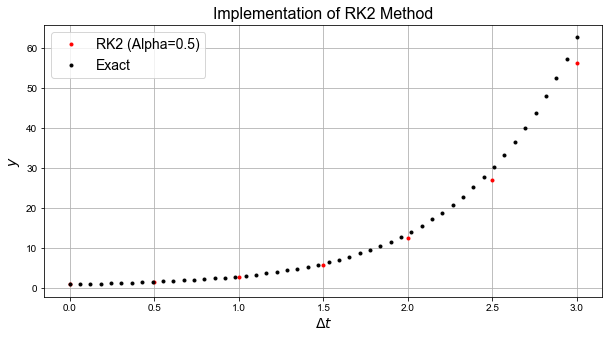

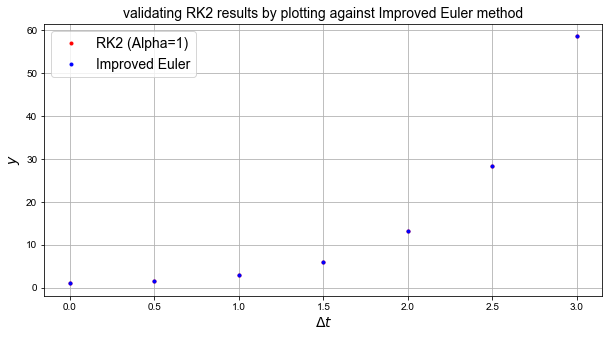

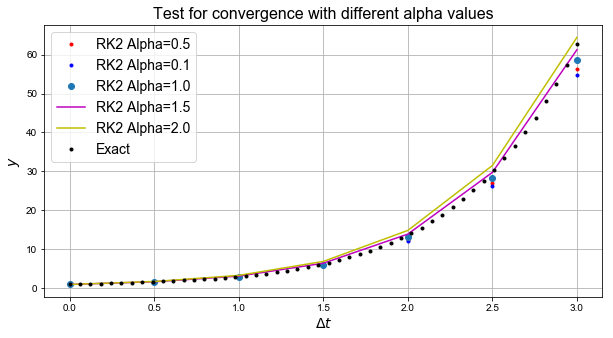

In [2]:
# parameters for problem to solve
dt = 0.5
y0 = 1.0
t0 = 0.0
tf = 2*np.pi
t_max = 3

t = np.linspace(0, 3, 50)  # time steps for exact solution

def f(t, y):
    '''
    function to return RHS of problem equation
    '''
    return y + t**3

def y_ex(t):
    '''
    function to return solution to exact equation
    '''
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

y_r = y_ex(t)

def RK2_alpha(f, y0, t0, t_max, dt, alpha):
    '''
    function to implemnt RK2 family of methods
    or a specified alpha value.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    t_max is the maximum time for integration
    dt is the time step size.
    '''
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]                 
    while t < t_max:
        k1 = dt*f(t, y)
        k2 = dt*f(t + alpha*dt, y + alpha*k1)
        y = y + (1. - (1/(2*alpha)))*(k1) + ((1/(2*alpha))*k2)
        y_all.append(y)
        t = t + dt
        t_all.append(t)
        
    return np.array(t_all), np.array(y_all)

t_RK, y_RK = RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5)


#  set up figure to implement RK2
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.plot(t_RK, y_RK, 'r.', label='RK2 (Alpha=0.5)')
ax1.plot(t, y_r, 'k.', label='Exact')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('$y$', fontsize=14)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)
ax1.set_title('Implementation of RK2 Method', fontsize=16)

def improved_euler(f, y0, t0, t_max, dt):
    '''
    funtion to implement the improved Euler method
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    t_max is the maximum time for integration
    dt is the time step size.    
    '''
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        ye = y + dt*f(t, y)  # euler guess
        y = y + 0.5*dt* ( f(t, y) + f(t + dt, ye) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(t_all), np.array(y_all)

t_RK, y_RK = RK2_alpha(f, y0, t0, t_max, dt, alpha=1)
t_eu, y_eu = improved_euler(f, y0, t0, t_max, dt)

#  set up figure for comparing RK2 and improved Euler methods
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.plot(t_RK, y_RK, 'r.', label='RK2 (Alpha=1)')
ax1.plot(t_eu, y_eu, 'b.', label='Improved Euler')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('$y$', fontsize=14)
ax1.legend(loc='best', fontsize=14)
ax1.set_title('validating RK2 results by plotting against Improved Euler method', fontsize=14)
ax1.grid(True)

t_RK, y_RK = RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5)
t_RK1, y_RK1 = RK2_alpha(f, y0, t0, t_max, dt, alpha=0.1)
t_RK2, y_RK2 = RK2_alpha(f, y0, t0, t_max, dt, alpha=1.0)
t_RK3, y_RK3 = RK2_alpha(f, y0, t0, t_max, dt, alpha=1.5)
t_RK4, y_RK4 = RK2_alpha(f, y0, t0, t_max, dt, alpha=2.0)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.plot(t_RK, y_RK, 'r.', label='RK2 Alpha=0.5')
ax1.plot(t_RK1, y_RK1, 'b.', label='RK2 Alpha=0.1')
ax1.plot(t_RK2, y_RK2, 'o', label='RK2 Alpha=1.0')
ax1.plot(t_RK3, y_RK3, 'm', label='RK2 Alpha=1.5')
ax1.plot(t_RK4, y_RK4, 'y', label='RK2 Alpha=2.0')
ax1.plot(t, y_r, 'k.', label='Exact')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('$y$', fontsize=14)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)
ax1.set_title('Test for convergence with different alpha values', fontsize=16)

## comparison of convergence results with forward and improved Euler methods using several values of alpha

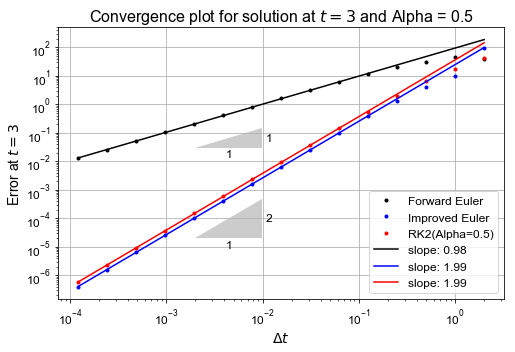

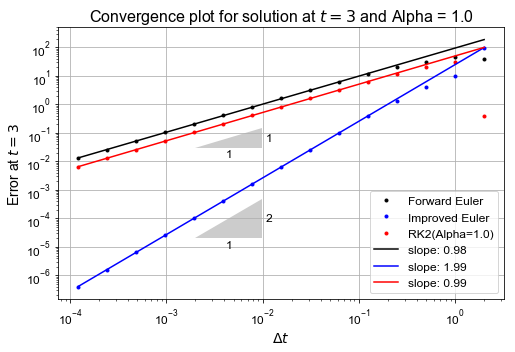

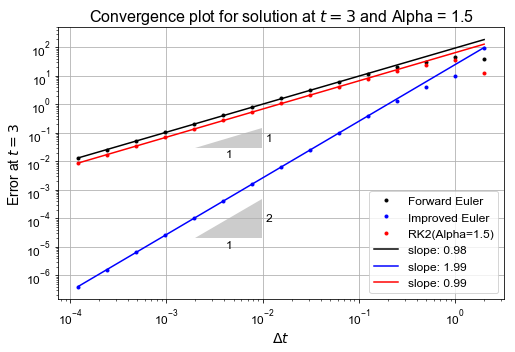

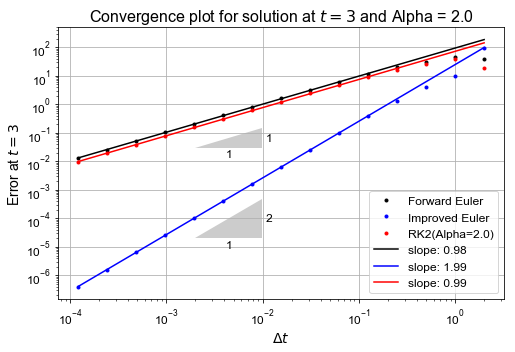

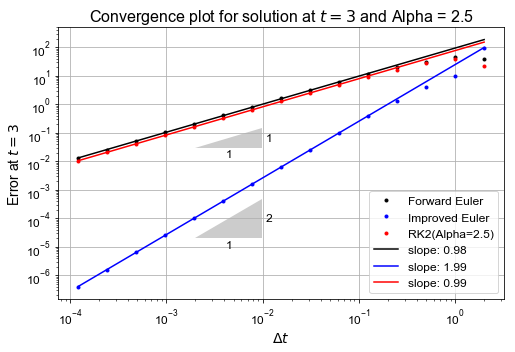

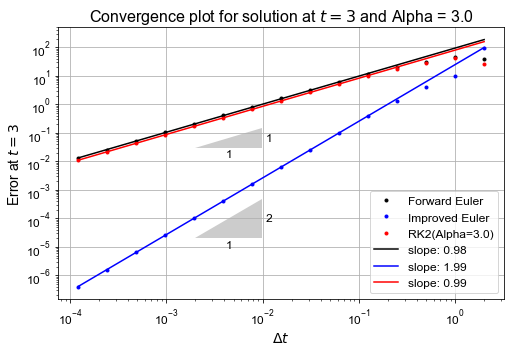

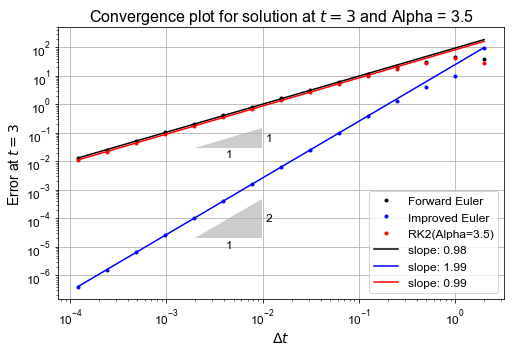

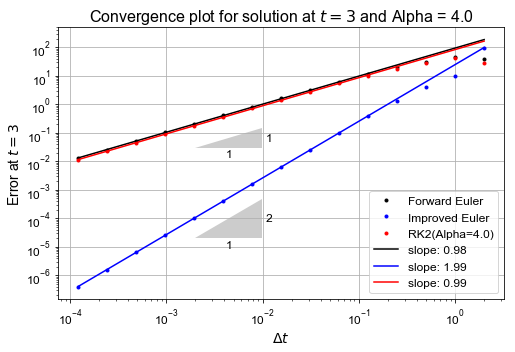

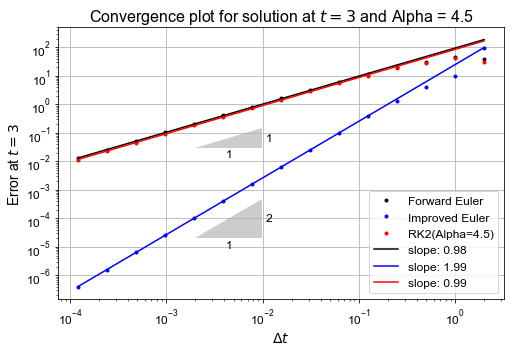

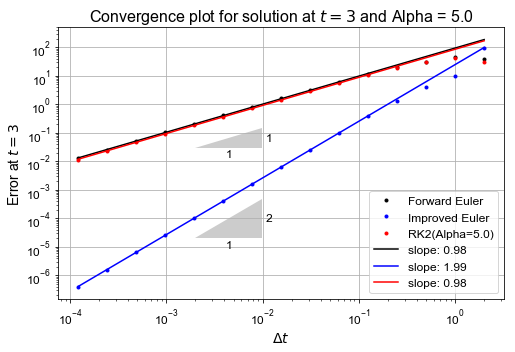

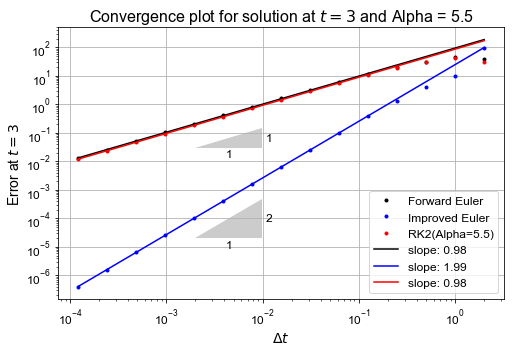

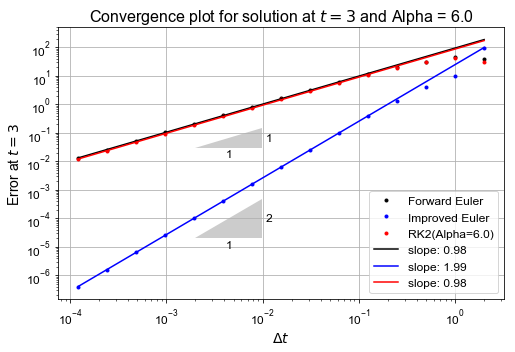

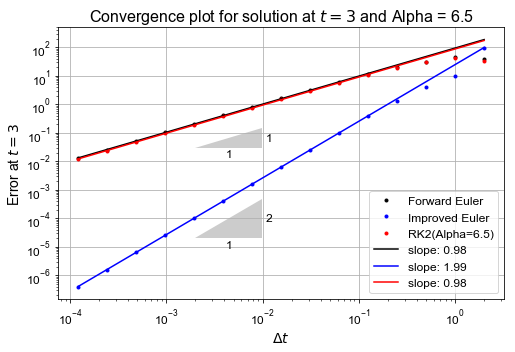

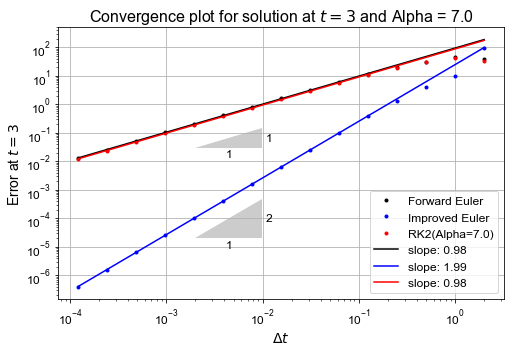

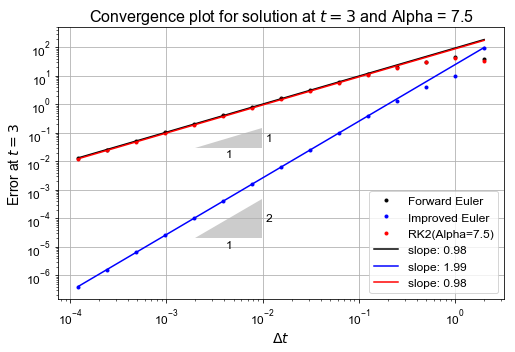

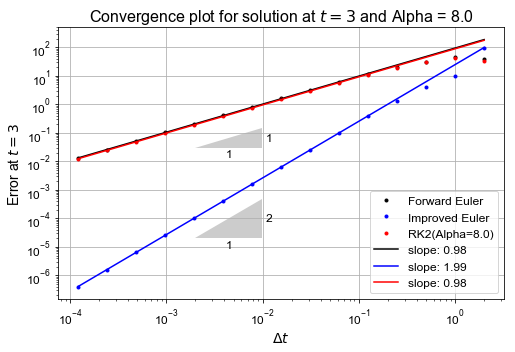

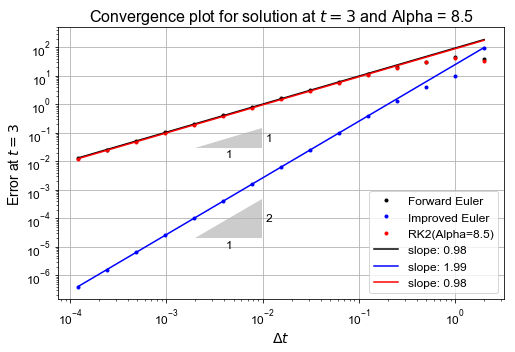

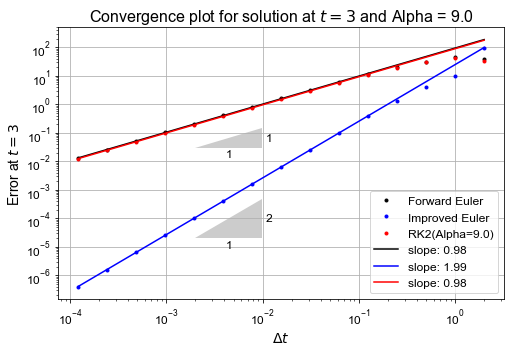

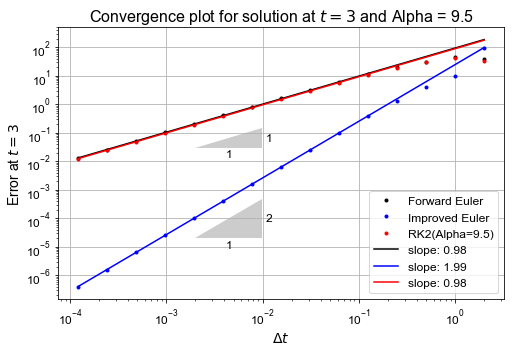

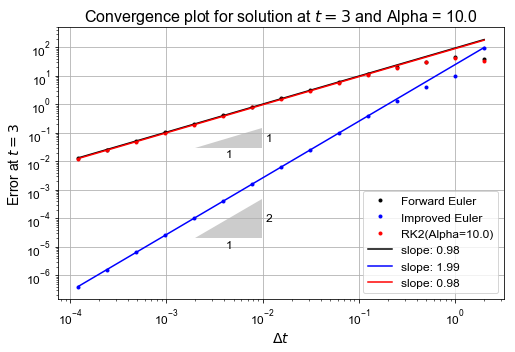

In [146]:
# parameters for problem
dt = 0.04
y0 = 1.0
t0 = 0.0
tf = 2*np.pi
t_max = 3


def f(t, y):
    '''
    function to return RHS of problem equation
    '''
    return y + t**3

def y_ex(t):
    '''
    function to return exact solution to problem
    '''
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

y_r = y_ex(t_max)

alpha = 0.5

# loop to test for convergence using several alpha values
while alpha <= 10:
    def RK2_alpha(f, y0, t0, t_max, dt, alpha):
        '''
        function to return RK2 approximation
        f = f(t,y) is the RHS function.
        y0 is the initial condition.
        t0 is the initial time; t_max is the end time.
        t_max is the maximum time for integration
        dt is the time step size.
        '''
        y = np.array(y0)
        t = np.array(t0)
        y_all = [y0]
        t_all = [t0]                 
        while t < t_max:
            k1 = dt*f(t, y)
            k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
            y = y + (1. - (1/(2*alpha)))*(k1) + ((1/(2*alpha))*k2)
            y_all.append(y)
            t = t + dt
            t_all.append(t)
        return np.array(t_all), np.array(y_all)

    def forward_euler(f, y0, t0, t_max, dt):
        '''
        function to return Forward Euler approximation
        f = f(t,y) is the RHS function.
        y0 is the initial condition.
        t0 is the initial time; t_max is the end time.
        t_max is the maximum time for integration
        dt is the time step size.
        '''
        y = np.array(y0)
        t = np.array(t0)
        y_all = [y0]
        t_all = [t0]
        while t < t_max:
            y = y + dt*f(t, y)  # euler guess
            y_all.append(y)
            t = t + dt
            t_all.append(t)
        return np.array(t_all), np.array(y_all)

    def improved_euler(f, y0, t0, t_max, dt):
        '''
        function to return Improved Euler approximation
        f = f(t,y) is the RHS function.
        y0 is the initial condition.
        t0 is the initial time; t_max is the end time.
        t_max is the maximum time for integration
        dt is the time step size.
        '''
        y = np.array(y0)
        t = np.array(t0)
        y_all = [y0]
        t_all = [t0]
        while t < t_max:
            ye = y + dt*f(t, y)  # euler guess
            y = y + 0.5*dt* ( f(t, y) + f(t + dt, ye) )
            y_all.append(y)
            t = t + dt
            t_all.append(t)
        return np.array(t_all), np.array(y_all)

    def approx_error(dt, t_max):
        t_fe, y_fe = forward_euler(f, y0, t0, t_max, dt)
        err_fe = abs(y_fe[-1]-(y_r))
        t_ie, y_ie = improved_euler(f, y0, t0, t_max, dt)
        err_ie = abs(y_ie[-1]-(y_r))
        t_RK2, y_RK2 = RK2_alpha(f, y0, t0, t_max, dt, alpha)
        err_RK2 = abs(y_RK2[-1]-(y_r))
        return err_fe, err_ie, err_RK2

    error_fe = []
    error_ie = []
    error_RK2 = []
    dt_array = []
    dt = 2
    while dt > 1.e-4:
        dt_array.append(dt)
        err_fe, err_ie, err_RK2 = approx_error(dt, 3)
        error_fe.append(err_fe)
        error_ie.append(err_ie)
        error_RK2.append(err_RK2)
        dt *= 0.5

    fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
    ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
    ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
    ax1.loglog(dt_array, error_RK2, 'r.', label='RK2(Alpha={})'.format(alpha))
    ax1.set_xlabel('$\Delta t$', fontsize=14)
    ax1.set_ylabel('Error at $t=3$', fontsize=14)
    ax1.set_title('Convergence plot for solution at $t=3$ and Alpha = {}'.format(alpha), fontsize=16)
    ax1.grid(True)
    ax1.legend(loc='best', fontsize=14)

    start_fit = 4

    line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
    line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)
    line_fit_RK2 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_RK2[start_fit:]), 1)

    ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
    ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_ie[0]))
    ax1.loglog(dt_array, np.exp(line_fit_RK2[1]) * dt_array**(line_fit_RK2[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_RK2[0]))

    annotation.slope_marker((2e-3, 3e-2), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
    annotation.slope_marker((2e-3, 2e-5), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)


    ax1.legend(loc='best')
    
    alpha +=0.5


## Determination of optimal aplha value

The optimal value of ALPHA to 1 significant figure is 2.1


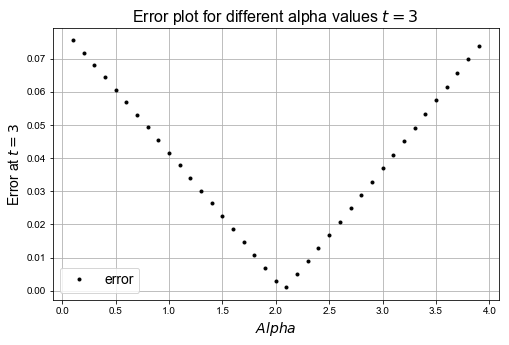

In [21]:
dt = 0.04
y0 = 1.0
t0 = 0.0
tf = 2*np.pi
t_max = 3

t = np.linspace(0, 5, 100)

def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

y_r = y_ex(t_max)

def RK2_alpha(f, y0, t0, t_max, dt, alpha):
    '''
    function to return RK2 approximation
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    t_max is the maximum time for integration
    dt is the time step size.
    '''
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]                 
    while t < t_max:
        k1 = dt*f(t, y)
        k2 = dt*f(t + alpha*dt, y + alpha*k1)
        y = y + (1. - (1/(2*alpha)))*(k1) + ((1/(2*alpha))*k2)
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(t_all), np.array(y_all)

# error at a fixed time step to determine oprimal alpha value
error_RK2 = []
alpha_array = []
alpha = 0.1
while alpha < 4.0:
    t_RK2, y_RK2 = RK2_alpha(f, y0, t0, t_max, dt, alpha)
    err_RK2 = abs(y_RK2[-1]-(y_r))
    alpha_array.append(alpha)
    error_RK2.append(err_RK2)
    alpha += 0.1

ind = np.argmin(error_RK2) # to check the index of the minimum error value
 
# to check and print the alpha value at the minimum error
print("The optimal value of ALPHA to 1 significant figure is {0:.1f}".format(alpha_array[ind])) 

# plot to show the error and optimal aplha value for the problem
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(alpha_array, error_RK2, 'k.', label='error')
ax1.set_xlabel('$Alpha$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.set_title('Error plot for different alpha values $t=3$', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

# Comments <a class="tocSkip">

- The optimal $\alpha$ value was returned by the program, printing the $\alpha$ value that at the minimum error.
- The plot of the convergence at a fixed time step shows that the orders of convergence for each method as follows;


1. Forward Euler is 1
2. Improved Wuler is 2
3. RK2 is 2



- The plot of the RK2 Method at $\alpha$ = 1 matches that of improved Euler method, indicating accurate implementation of RK2 scheme.


## Coursework 1B

# Function to compute and return Taylor's series up to third order.

The output for Taylors series first order are as shown below 
 [ 1.          1.04        1.08160256  1.12488714  1.16995175  1.21691366
  1.2659102   1.31709957  1.37066164  1.42679882  1.48573701  1.54772649
  1.61304291  1.68198831  1.75489216  1.83211249  1.91403699  2.00108423
  2.09370488  2.19238299  2.29763735  2.41002285  2.53013192  2.65859608
  2.79608744  2.94332038  3.10105319  3.27008988  3.45128196  3.64553035
  3.85378741  4.0770589   4.31640622  4.57294855  4.84786521  5.14239806
  5.45785398  5.7956075   6.15710348  6.54385994  6.95747098  7.39960982
  7.87203197  8.37657853  8.91517959  9.48985781 10.10273213 10.75602157
 11.45204932 12.19324681 12.98215812]
The output for Taylors series up to second order are as shown below 
 [ 1.          1.0408      1.08327109  1.1275048   1.17361206  1.22172399
  1.27199273  1.32459229  1.37971946  1.4375947   1.49846317  1.56259567
  1.63028972  1.70187066  1.77769275  1.85814038  1.94362931  2.0346079
  2.13155849  2.23499875  2

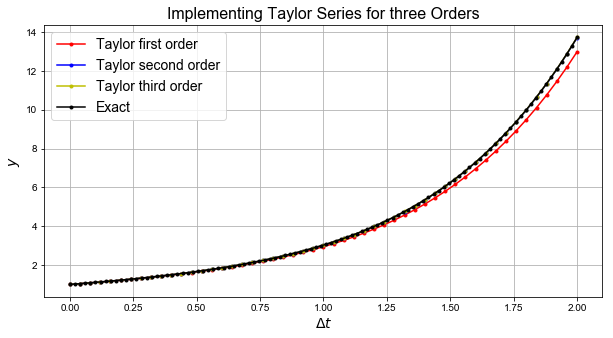

In [3]:
# problem parameters
dt = 0.04
y0 = 1.0
t0 = 0.0
tf = 2*np.pi
t_max = 2

t = np.linspace(0, 2, 100) # time steps for plotting exact result



def f(t, y):
    '''
    function to return RHS of problem equation
    '''
    return y + t**3

def y_ex(t):
    '''
    function to return exact solutio to problem equation
    '''
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

y_r = y_ex(t_max)

def f_t(t, y): # partial derivative of problem equation wrt t
    return 3*t**2

def f_y(t, y): # partial derivative of problem equation wrt y
    return 1

def f_t_t(t, y):  # double partial derivative of problem equation wrt t twice
    return 6*t

def f_y_y(t, y):  # double partial derivative of problem equation wrt y twice
    return 0

def f_t_y(t, y):  # double partial derivative of problem equation wrt t and y
    return 0

def Taylor_Solver(f, y0, t0, t_max, dt):
    '''
    A function to compute and return Taylor's series
    approximation up to third order.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    t_max is the maximum time for integration
    dt is the time step size.
    '''
    y1 = np.array(y0)
    y2 = np.array(y0)
    y3 = np.array(y0)
    t = np.array(t0)
    y_first = [y0]
    y_second = [y0]
    y_third = [y0]
    t_all = [t0]
    while t < t_max:
        y1 = y1 + dt*f(t, y1)  # euler guess first order
        y2 = y2 + dt*f(t, y2) + (dt**2/2)*(f_t(t, y2) + f_y(t, y2) * f(t, y2))  # euler guess second order
        y3 = y3 + dt*f(t, y3) + (dt**2/2)*(f_t(t, y3) + f_y(t, y3) * f(t, y3)) + (dt**3/6)*(f_t_t(t, y3) +
            2*f(t, y3)*f_t_y(t, y3) + f_t(t, y3)*f_y(t, y3) + (f(t,y3))**2 * f_y_y(t, y3) + f(t, y3) * (f_y(t, y3)**2) )
        y_first.append(y1)
        y_second.append(y2)
        y_third.append(y3)
        t = t + dt
        t_all.append(t)
    return np.array(t_all), np.array(y_first), np.array(y_second), np.array(y_third)

t_T, y_T1, y_T2, y_T3 = Taylor_Solver(f, y0, t0, t_max, dt)

k = np.array((t_T, y_T1))


#  setting up figure to plot results
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.plot(t_T, y_T1, 'r.-', label='Taylor first order')
ax1.plot(t_T, y_T2, 'b.-', label='Taylor second order')
ax1.plot(t_T, y_T3, 'y.-', label='Taylor third order')
ax1.plot(t, y_ex(t), 'k.-', label='Exact')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('$y$', fontsize=14)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)
ax1.set_title('Implementing Taylor Series for three Orders', fontsize=16)

#  printing the computed results up to third order
print('The output for Taylors series first order are as shown below \n', y_T1 )
print('The output for Taylors series up to second order are as shown below \n', y_T2 )
print('The output for Taylors series up to third order are as shown below \n', y_T3 )



# Computing errors and performing convergence analysis with respect to time step size

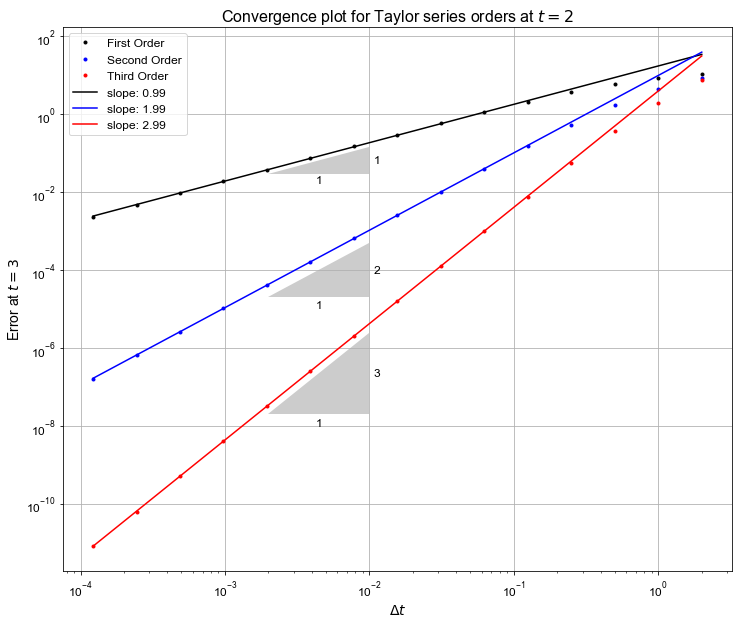

In [7]:
# problem parameters
dt = 0.04
y0 = 1.0
t0 = 0.0
tf = 2*np.pi
t_max = 2

t = np.linspace(0, 2, 100)  # time steps for exact solution



def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

y_r = y_ex(t_max)

t_T, y_T1, y_T2, y_T3 = Taylor_Solver(f, y0, t0, t_max, dt)


def approx_error(dt, t_max):  # determining error of Taylor's series up to third order
    t_T, y_T1, y_T2, y_T3 = Taylor_Solver(f, y0, t0, t_max, dt)
    err_1 = abs(y_T1[-1]-(y_r))
    err_2 = abs(y_T2[-1]-(y_r))
    err_3 = abs(y_T3[-1]-(y_r))
    return err_1, err_2, err_3

error_1 = []
error_2 = []
error_3 = []
dt_array = []
dt = 2

# computing error up to time t =2 
while dt > 1.e-4:
    dt_array.append(dt)
    err_1, err_2, err_3 = approx_error(dt, 2)
    error_1.append(err_1)
    error_2.append(err_2)
    error_3.append(err_3)
    dt *= 0.5

#  setting up figure to plot error results
fig, ax1 = plt.subplots(1, 1, figsize=(12, 10))
ax1.loglog(dt_array, error_1, 'k.', label='First Order')
ax1.loglog(dt_array, error_2, 'b.', label='Second Order')
ax1.loglog(dt_array, error_3, 'r.', label='Third Order')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for Taylor series orders at $t=2$', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

start_fit = 4

# to fit polynomial of degree 1 to each error result
line_fit_1 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_1[start_fit:]), 1)
line_fit_2 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_2[start_fit:]), 1)
line_fit_3 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_3[start_fit:]), 1)

# include slope values in label
ax1.loglog(dt_array, np.exp(line_fit_1[1]) * dt_array**(line_fit_1[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_1[0]))
ax1.loglog(dt_array, np.exp(line_fit_2[1]) * dt_array**(line_fit_2[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_2[0]))
ax1.loglog(dt_array, np.exp(line_fit_3[1]) * dt_array**(line_fit_3[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_3[0]))

# to display slope on figure with a traingle marker
annotation.slope_marker((2e-3, 3e-2), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 2e-5), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 2e-8), (3, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

ax1.legend(loc='best')

## COMMENTS 

The order of accuracy from the plots are as follows:
- First order has 1
- Second order has 2
- Third order has 3

Recall Taylor's series;


\begin{align*}
f(x_0+h) & = f(x_0) + hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots\\[5pt]
& = f(x_0)+hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \mathcal{O}(h^3),
\end{align*}

The *local truncation error* (*LTE*) is defined as the difference between the exact solution to the problem and the numerical scheme.

For First order,

$$\tau := f'(x_0) - \frac{f(x_0+h)-f(x_0)}{h} = \mathcal{O}(h). $$

For Second order,
$$\tau := f'(x_0) - \frac{f(x_0+h)-f(x_0)-(1/2)(h^2)f''(x_0)}{h} = \mathcal{O}(h^2). $$

For Third order,
$$\tau := f'(x_0) - \frac{f(x_0+h)-f(x_0)-(1/2)(h^2)f''(x_0)-(1/6)(h^3)f'''(x_0)}{h} = \mathcal{O}(h^3). $$

- Therefore, it can be concluded that the convergence results from the log-log plot gave the expected LTE of the methods used, as confirmed by the drivation above.


## Coursework 1C  

# Derivation of AM3 Scheme

# Repeat of AB2 derivation (in lecture 6) for AM3

The Adams-Moulton family are implicit schemes, which means $\beta_k\ne 0$ in the general linear relation below:

$$\sum_{j=0}^k \alpha_j \, y_{n+j} = \Delta t \sum_{j=0}^k \beta_j \, f(t_{n+j},y_{n+j}).$$

In *Adams* methods we make the choice $\alpha_k=1$, $\alpha_{k-1}=-1$, with the rest of the $\alpha$ parameters chosen to be zero.

Also, the Adams schemes can be thought of as methods which start from the expression

$$y_{n+1} - y_{n} = \int_{t_{n}}^{t_{n+1}} {f}(t,{y}(t))\, dt.$$ 

The LHS is in the form of the general LMS expression written above, with $\alpha_k=1$, $\alpha_{k-1}=-1$.

for AM3, K=3 i.e

$$y_{n+1} - y_n = \Delta t \left( b_3 \, f_{n-2} + b_2 \, f_{n-1} + b_1 \, f_n + b_0 \, f_{n+1} \right) \approx  \int_{t_{n}}^{t_{n+1}} {f}(t,{y}(t))\, dt,$$

It should be noted that the order of accuracy of the AM4 schemes is equal to $k+1$ (one higher than AB for the same $k$ reason why we have an additional parameter here)

We also assume that,

$$t_{n-2} = -2\Delta t,\;t_{n-1} = -\Delta t,\; t_n = 0,\; t_{n+1} = \Delta t$$

\begin{align*}
  f(t)\equiv 1: \;\;\;\; \int_{t_{n}}^{t_{n+1}} \, dt & = \Delta t  = \Delta t \left( b_3 + b_2 + b_1  + b_0 \right) \;\;\;\; \implies \;\;\;\; 1 = b_3 + b_2 + b_1  + b_0 , \\[10pt]
  f(t)\equiv t: \;\;\;\; \int_{t_{n}}^{t_{n+1}} t\, dt & = \frac{\Delta t^2}{2}  = \Delta t \left(-2\Delta t b_3 + -\Delta t b_2 + \Delta t b_0 \right) \;\;\;\; \implies \;\;\;\; \frac{1}{2} = -2b_3 - b_2 + b_0 , \\[10pt]
  f(t)\equiv t^2: \;\;\;\; \int_{t_{n}}^{t_{n+1}} t^2\, dt & = \frac{\Delta t^3}{3}  = \Delta t \left((-2\Delta t)^2 b_3 + (-\Delta t)^2 b_2 + (\Delta t)^2 b_0 \right) \;\;\;\; \implies \;\;\;\; \frac{1}{3} = 4b_3 + b_2 + b_0 , \\[10pt]
  f(t)\equiv t^3: \;\;\;\; \int_{t_{n}}^{t_{n+1}} t^3\, dt & = \frac{\Delta t^4}{4}  = \Delta t \left((-2\Delta t)^3 b_3 + (-\Delta t)^3 b_2 + (\Delta t)^3 b_0 \right) \;\;\;\; \implies \;\;\;\; \frac{1}{4} = -8b_3 - b_2 + b_0  .
\end{align*}

which yeilds the system below

$$
\begin{pmatrix}
1 & 1 & 1 & 1 \\
0 & 1 & -1 & -2 \\
0 & 1 & 1 & 4 \\
0 & 1 & -1 & -8 
\end{pmatrix}
\begin{pmatrix}
b_1 \\
b_0\\
b_2\\
b_3
\end{pmatrix}
=
\begin{pmatrix}
1\\
1/2\\
1/3\\
1/4
\end{pmatrix}
$$

Applying gaussian elimination method reduces the matrix below, which can be solved by backward elimination method to determine the values of the coefficients

$$
\begin{pmatrix}
1 & 1 & 1 & 1 \\
0 & 1 & -1 & -2 \\
0 & 0 & -2 & -6 \\
0 & 0 & 0 & 6 
\end{pmatrix}
\begin{pmatrix}
b_1 \\
b_0\\
b_2\\
b_3
\end{pmatrix}
=
\begin{pmatrix}
1\\
1/2\\
1/6\\
1/4
\end{pmatrix}
$$

## Test

In [130]:
LHS_A = np.array([ [1., 1., 1., 1.], [1., 0., -1., -2.], [1., 0., 1., 4.], [1., 0., -1., -8.] ])
RHS_b = np.array([1., 1./2., 1./3., 1./4.])
AM3_b = np.linalg.solve(LHS_A, RHS_b)  
print('Our calculated AM3 coefficients: ',AM3_b)
print('Our coefficient agree with what we was given in the lecture: ',np.allclose(AM3_b, np.array([ 9./24., 19./24., -5./24., 1./24.])))

Our calculated AM3 coefficients:  [ 0.375       0.79166667 -0.20833333  0.04166667]
Our coefficient agree with what we was given in the lecture:  True


# Repeat of AB4 derivation (in homework 6, question 5) for AM3

Taking considering of the basic equations and assumptions for the AM schemes above, we have a scheme in the form below for AM3

$$y_{n+1} - y_n = \Delta t \left( b_3 f_{n+1} + b_2 f_{n} + b_1 f_{n-1} + b_0 f_{n-2} \right).$$

We want the following to hold for polynomials up to degree 4 in $t$, since this scheme is of order k+1

$$\int_{t_{n}}^{t_{n+1}} {f}(t,{y}(t))\, dt = \Delta t \left( b_3 f_{n+1} + b_2 f_{n} + b_1 f_{n-1} + b_0 f_{n-2} \right).$$

As per the hint, let's consider  

$$f(t,y(t)):=P_{N+1}(t) = t (t + \Delta t) \dots (t + N\Delta t),$$ 

as well as 

$$t_{n+1} := 0, \;\;\;\; 
t_n := -\Delta t, \;\;\;\; 
t_{n-1} := -2\Delta t,\;\;\;\; 
t_{n-2} := -3\Delta t, \ldots$$

We will see in the derivation below why these are particularly convenient choices.

We thus have the following conditions to be satisfied:

\begin{align*}
f(t):= 1: \;\;\;\; 
LHS & = \int_{t_{n}}^{t_{n+1}} \, dt  = \Delta t \\[5pt]
RHS &= \Delta t \left[ b_3 + b_2 + b_1 + b_0 \right]\\[15pt]
%
f(t):= t: \;\;\;\; 
LHS & = \int_{t_{n}}^{t_{n+1}} t\, dt  = -\frac{\Delta t^2}{2}  \\[5pt]
RHS &= \Delta t \left( b_3 f(0) + b_2 f(-\Delta t) + b_1 f(-2\Delta t) + b_0 f(-3\Delta t)\right)\\[5pt]
&= \Delta t \left[ -\Delta t \left(  b_2  + 2 b_1  + 3 b_0 \right) \right] \\[5pt]
&= \Delta t^2 \left[ -b_2  -2 b_1  -3 b_0 \right]\\[15pt]
%
f(t):=  t(t+\Delta t): \;\;\;\; 
LHS & = \int_{t_{n}}^{t_{n+1}} f(t)\, dt  = -\frac{\Delta t^3}{6}  \\[5pt]
RHS &= \Delta t \left( b_3 f(0) + b_2 f(-\Delta t) + b_1 f(-2\Delta t) + b_0 f(-3\Delta t)\right)\\[5pt]
&= \Delta t \left[    -2 \Delta t(-2\Delta t +\Delta t) b_1  -3\Delta t(-3\Delta t +\Delta t) b_0  \right] \\[5pt]
&= \Delta t^3 \left[  2 b_1  + 6 b_0  \right] \\[15pt]
%
f(t):=  t(t+\Delta t)(t+2\Delta t): \;\;\;\; 
LHS & = \int_{t_{n}}^{t_{n+1}} f(t)\, dt  = -\frac{\Delta t^4}{4}  \\[5pt]
RHS &= \Delta t \left( b_3 f(0) + b_2 f(-\Delta t) + b_1 f(-2\Delta t) + b_0 f(-3\Delta t)\right)\\[5pt]
&= \Delta t \left[   -3\Delta t(-3\Delta t +\Delta t)(-3\Delta t + 2\Delta t) b_0  \right] \\[5pt]
&= \Delta t^4 \left[  -6 b_0  \right] 
\end{align*}


which yields the linear system

$$
\begin{pmatrix}
1 & 1 & 1 & 1 \\
0 & -1 & -2 & -3 \\
0 & 0 & 2 & 6 \\
0 & 0 & 0 & -6 
\end{pmatrix}
\begin{pmatrix}
b_3 \\
b_2\\
b_1\\
b_0
\end{pmatrix}
=
\begin{pmatrix}
1\\
-1/2\\
-1/6\\
-1/4
\end{pmatrix}
$$


## Test

In [131]:
LHS_A = np.array([ [1., 1., 1., 1.], [0., -1., -2., -3.], [0., 0., 2., 6.], [0., 0., 0., -6.] ])
RHS_b = np.array([1., -1./2., -1./6., -1./4.])
AM3_b = np.linalg.solve(LHS_A, RHS_b)  
print('Our calculated AM3 coefficients: ',AM3_b)
print('Our coefficient agree with what we was given in the lecture: ',np.allclose(AM3_b, np.array([ 9./24., 19./24., -5./24., 1./24.])))

Our calculated AM3 coefficients:  [ 0.375       0.79166667 -0.20833333  0.04166667]
Our coefficient agree with what we was given in the lecture:  True


## COMMENT

- It has been shown that derived coefficients in both derivations above corresponds with those given in the lecture as shown by the tests.


## Implementing a predictor- corrector pair to give the AM3-PC Scheme

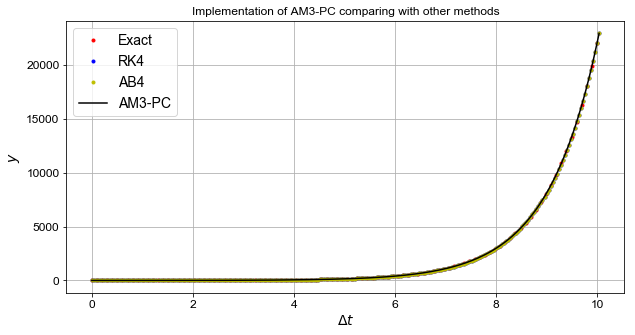

In [162]:
def f(t, y):
    '''
    function to return RHS of exact equation
    '''
    val = y
    return y

def exact(t):
    '''
    retruns exact soultion to ODE
    '''
    return np.exp(t)

def AM3_PC(f, y0, t0, t_max, dt):
    '''
    implementing AM3 scheme by combining with AB4 
    as a predictor-corrector pair
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    t_max is the maximum time for integration
    dt is the time step size.
    '''
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    y_AM3_PC = [y0]
    t_all = [t0] 
    
    for n in range(4): #compute AB3 parameters
        k1 = dt*f(t, y)
        k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
        k3 = dt*f(t + 0.5*dt, y + 0.5*k2)
        k4 = dt*f(t + dt, y + k3)
        y = y + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
        y_all.append(y)
        y_AM3_PC.append(y)
        t = t + dt
        t_all.append(t)
        
    # compute AB4 coefficients to be used as a predictor
    LHS_A = np.array([ [1., 1., 1., 1.], [0., -1., -2., -3.], [0., 0., 2., 6.], [0., 0., 0., -6.] ])
    RHS_b = np.array([1., 1./2., 5./6., 9./4.])
    AB4_b = np.linalg.solve(LHS_A, RHS_b)             
    while t < t_max:
        y = y + dt * (AB4_b[0]*f(t, y_all[-1]) + AB4_b[1]*f(t-dt, y_all[-2]) 
                    + AB4_b[2]*f(t-2*dt, y_all[-3]) + AB4_b[3]*f(t-3*dt, y_all[-4]))
        y_all.append(y)
        y_main = y_AM3_PC[-1] + (dt/24) * (9*f(t+dt, y_all[-1]) + 19*f(t, y_AM3_PC[-1]) 
                    - 5*f(t -dt, y_AM3_PC[-2]) + f(t-2*dt, y_AM3_PC[-3])) 
        y_AM3_PC.append(y_main)
        t = t + dt
        t_all.append(t)
    return np.array(t_all), np.array(y_AM3_PC)

def AB4(f, y0, t0, t_max, dt):
    '''
    function to implement AB4 scheme
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    t_max is the maximum time for integration
    dt is the time step size.
    '''
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0] 

    for n in range(3):  # computing AB4 parameters
        k1 = dt*f(t, y)
        k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
        k3 = dt*f(t + 0.5*dt, y + 0.5*k2)
        k4 = dt*f(t + dt, y + k3)
        y = y + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
        y_all.append(y)
        t = t + dt
        t_all.append(t)
        
    # compute AB4 coefficients
    LHS_A = np.array([ [1., 1., 1., 1.], [0., -1., -2., -3.], [0., 0., 2., 6.], [0., 0., 0., -6.] ])
    RHS_b = np.array([1., 1./2., 5./6., 9./4.])
    AB4_b = np.linalg.solve(LHS_A, RHS_b)             
    while t < t_max:
        y = y + dt * (AB4_b[0]*f(t, y_all[-1]) + AB4_b[1]*f(t-dt, y_all[-2]) 
                    + AB4_b[2]*f(t-2*dt, y_all[-3]) + AB4_b[3]*f(t-3*dt, y_all[-4]))
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(t_all), np.array(y_all)

def RK4(f, y0, t0, t_max, dt):
    '''
    function to implement RK4 scheme
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    t_max is the maximum time for integration
    dt is the time step size.
    '''
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]                 
    while t < t_max:
        k1 = dt*f(t, y)
        k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
        k3 = dt*f(t + 0.5*dt, y + 0.5*k2)
        k4 = dt*f(t + dt, y + k3)
        y = y + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(t_all), np.array(y_all)

t_AM3_PC, y_AM3_PC = AM3_PC(f, y0, t0, t_max, dt)
t_RK4, y_RK4 = RK4(f, y0, t0, t_max, dt)
t_AB4, y_AB4 = AB4(f, y0, t0, t_max, dt)

# problem parameters
dt = 0.04
y0 = 1.0
t0 = 0.0
t_max = 10
t = np.linspace(0, 10, 100)

# set up figure and plot results for the 3 schemes for comparison
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.plot(t, exact(t), 'r.', label='Exact')
ax1.plot(t_RK4, y_RK4, 'b.', label='RK4')
ax1.plot(t_AB4, y_AB4, 'y.', label='AB4')
ax1.plot(t_AM3_PC, y_AM3_PC, 'k', label='AM3-PC')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('$y$', fontsize=14)
ax1.legend(loc='best', fontsize=14)
ax1.set_title('Implementation of AM3-PC comparing with other methods', fontsize=12)
ax1.grid(True)

## Comparing AM3-PC accuracy with RK4 and AB4

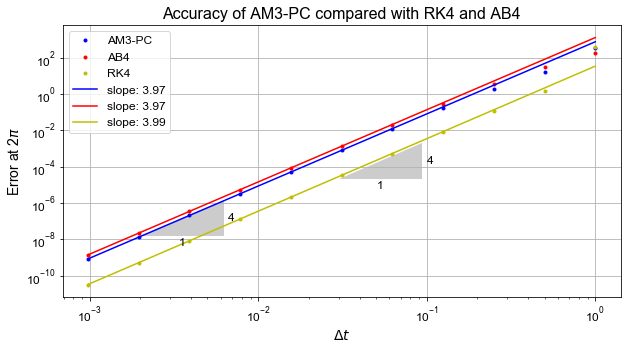

In [134]:
def f(t, y):  # ODE RHS
    val = y
    return y

def AM3_PC(f, y0, t0, t_max, dt):  # AM3-PC  scheme
    """ AM3-PC time-stepper.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    t_max is the maximum time for integration
    dt is the time step size.
    """
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    y_AM3_PC = [y0]
    t_all = [t0] 
    
    for n in range(4):
        k1 = dt*f(t, y)
        k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
        k3 = dt*f(t + 0.5*dt, y + 0.5*k2)
        k4 = dt*f(t + dt, y + k3)
        y = y + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
        y_all.append(y)
        y_AM3_PC.append(y)
        t = t + dt
        t_all.append(t)
        
    # compute AB4 coefficients for prediction
    LHS_A = np.array([ [1., 1., 1., 1.], [0., -1., -2., -3.], [0., 0., 2., 6.], [0., 0., 0., -6.] ])
    RHS_b = np.array([1., 1./2., 5./6., 9./4.])
    AB4_b = np.linalg.solve(LHS_A, RHS_b)             
    while t < t_max:
        y = y + dt * (AB4_b[0]*f(t, y_all[-1]) + AB4_b[1]*f(t-dt, y_all[-2]) 
                    + AB4_b[2]*f(t-2*dt, y_all[-3]) + AB4_b[3]*f(t-3*dt, y_all[-4]))
        y_all.append(y)
        y_main = y_AM3_PC[-1] + (dt/24) * (9*f(t+dt, y_all[-1]) + 19*f(t, y_AM3_PC[-1]) 
                    - 5*f(t -dt, y_AM3_PC[-2]) + f(t-2*dt, y_AM3_PC[-3])) 
        y_AM3_PC.append(y_main)
        t = t + dt
        t_all.append(t)
    return np.array(t_all), np.array(y_AM3_PC)

def AB4(f, y0, t0, t_max, dt):  # AB4 scheme
    """ AB4 time-stepper.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    t_max is the maximum time for integration
    dt is the time step size.
    """
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0] 

    for n in range(3):
        k1 = dt*f(t, y)
        k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
        k3 = dt*f(t + 0.5*dt, y + 0.5*k2)
        k4 = dt*f(t + dt, y + k3)
        y = y + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
        y_all.append(y)
        t = t + dt
        t_all.append(t)
        
    # compute AB4 coefficients
    LHS_A = np.array([ [1., 1., 1., 1.], [0., -1., -2., -3.], [0., 0., 2., 6.], [0., 0., 0., -6.] ])
    RHS_b = np.array([1., 1./2., 5./6., 9./4.])
    AB4_b = np.linalg.solve(LHS_A, RHS_b)             
    while t < t_max:
        y = y + dt * (AB4_b[0]*f(t, y_all[-1]) + AB4_b[1]*f(t-dt, y_all[-2]) 
                    + AB4_b[2]*f(t-2*dt, y_all[-3]) + AB4_b[3]*f(t-3*dt, y_all[-4]))
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(t_all), np.array(y_all)

def RK4(f, y0, t0, t_max, dt):  # RK4 scheme
    """ RK4 time-stepper.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    t_max is the maximum time for integration
    dt is the time step size.
    """ 
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]                 
    while t < t_max:
        k1 = dt*f(t, y)
        k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
        k3 = dt*f(t + 0.5*dt, y + 0.5*k2)
        k4 = dt*f(t + dt, y + k3)
        y = y + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(t_all), np.array(y_all)

# problem parameters
dt = 0.157
y0 = 1.0
t0 = 0.0
t_max = 2*np.pi

# determine schemes errors
def approx_error(dt, t_max):
    tall, yall = AM3_PC(f, y0, t0, t_max, dt)
    err1 = abs(yall[-1]-np.exp(t_max))
    tall, yall = AB4(f, y0, t0, t_max, dt)
    err2 = abs(yall[-1]-np.exp(t_max))
    tall, yall = RK4(f, y0, t0, t_max, dt)
    err3 = abs(yall[-1]-np.exp(t_max))
    return err1, err2, err3


error_AM3_PC = []
error_ab4 = []
error_RK4 = []
dt_array = []
dt = 1
while dt > 5.e-4:  # computing error at approx 2*pi
    dt_array.append(dt)
    err1, err2, err3 = approx_error(dt, 6.5)
    error_AM3_PC.append(err1)
    error_ab4.append(err2)
    error_RK4.append(err3)
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.loglog(dt_array, error_AM3_PC, 'b.', label='AM3-PC')
ax1.loglog(dt_array, error_ab4, 'r.', label='AB4')
ax1.loglog(dt_array, error_RK4, 'y.', label='RK4')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at 2$\pi$', fontsize=14)
ax1.grid(True)
ax1.set_title('Accuracy of AM3-PC compared with RK4 and AB4', fontsize=16)

# to fit best fit linear line to data
start_fit = 4


line_fit_AM3_PC = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_AM3_PC[start_fit:]), 1)
line_fit_ab4 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ab4[start_fit:]), 1)
line_fit_RK4 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_RK4[start_fit:]), 1)

# include slope as label
ax1.loglog(dt_array, np.exp(line_fit_AM3_PC[1]) * dt_array**(line_fit_AM3_PC[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_AM3_PC[0]))
ax1.loglog(dt_array, np.exp(line_fit_ab4[1]) * dt_array**(line_fit_ab4[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_ab4[0]))
ax1.loglog(dt_array, np.exp(line_fit_RK4[1]) * dt_array**(line_fit_RK4[0]), 'y-', label = 'slope: {:.2f}'.format(line_fit_RK4[0]))

# display slope on plot
annotation.slope_marker((3e-2, 2e-5), (4, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 1.5e-8), (4, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)


ax1.legend(loc='best')

## Comment

- Based on my result, it is evident that the ratio between the errors obtained with AB4 and AM3-PC is 1

- The ratio of the errors could have been estimated from the Local Truncation Errors of the methods (which is the absolute difference between the exact and numerical solutions)

That is,

$$\tau := \frac{1}{\Delta t}\left[ \sum_{j=0}^k \alpha_j \, y(t_{n+j}) - \Delta t \sum_{j=0}^k \beta_j \, y'(t_{n+j})\right],$$

- The LTE for a m-step explicit scheme is  $\tau=\mathcal{O}(\Delta t^m)$ while that of a m-step implicit scheme is  $\tau=\mathcal{O}(\Delta t^{m+1})$

## QUESTION 1D ##

(-1.7, 1.7)

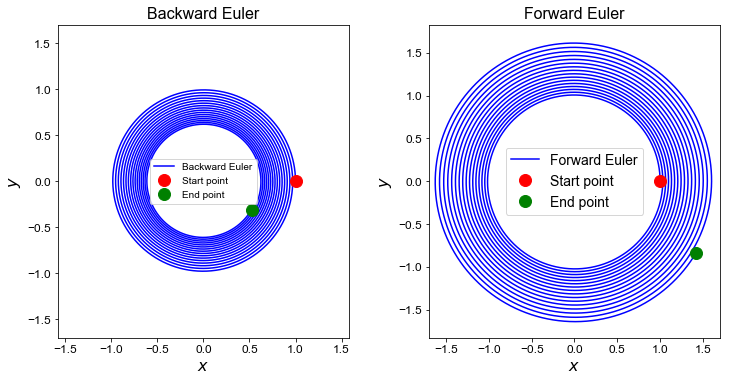

In [6]:
def f(t, y): 
    '''
    function to return RHS of coupled ODEs
    '''
    f = np.zeros_like(y)
    f[0] = -y[1]
    f[1] =  y[0]   
    return f

# problem parameters
dt = 0.01
y0 = np.array([1.,0.])
t0 = 0.0
tf = 100


y0 = np.array([1.,0.])
t0 = 0.0

def forward_euler(f, y0, t0, tf, dt):
    """ Forward Euler time-stepper.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    tf is the maximum time for integration
    """ 
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < tf:
        y = y + dt*f(t, y)  # euler guess
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


def backward_euler(f, y0, t0, tf, dt):
    """ Bakward Euler time-stepper.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    tf is the maximum time for integration
    """  
    y = np.array(y0)
    t = np.array(t0)
    t_all = [t0]
    y_all = [y0]
    while t < tf:
        y_init = y + dt * f(t, y)
        def func(yn):  # defining the non linear equation to be solved.
            return yn - y - dt*f(t+dt,yn)            
        y_i = fsolve(func, y_init)  # solving the non linear equation using fsolve scipy optimizer
        y = y_i
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(t_all), np.array(y_all)
        
# set up figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(w_pad=4)
t, y = backward_euler(f, y0, t0, tf, dt)
ax1.plot(y[:,0], y[:,1], 'b', label='Backward Euler')
ax1.plot(y[0,0], y[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(y[-1,0], y[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Backward Euler', fontsize=16)
ax1.axis('equal')
ax1.legend(loc='center', fontsize=10)
ax1.set_xlim(-1.7,1.7)
ax1.set_ylim(-1.7,1.7)  

y0 = np.array([1.,0.])  # initial condition
t0 = 0.0
y, t = forward_euler(f, y0, t0, tf, dt)
ax2.plot(y[:,0], y[:,1], 'b', label='Forward Euler')
ax2.plot(y[0,0], y[0,1], 'ro', label='Start point', markersize=12)
ax2.plot(y[-1,0], y[-1,1], 'go', label='End point', markersize=12)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('Forward Euler', fontsize=16)
ax2.axis('equal')
ax2.legend(loc='best', fontsize=14)
ax2.set_xlim(-1.7,1.7)
ax2.set_ylim(-1.7,1.7)


## Comment

- Both methods clearly do not form a closed circle as expected. While the forward Euler produces orbit that increases in diameter, the backward Euler results to an orbit which gradually decreases in diameter.

- Both Forward and Backward Euler are first order accurate, hence their non suitability for this case.

- Though Backward Euler is unconditionally stable, it has been shown here that stability does not necessarily translate to accuracy.

C:\Users\falol\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(-1.7, 1.7)

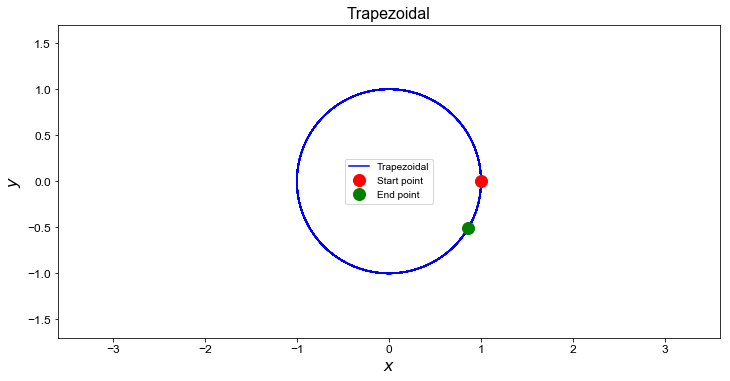

In [7]:
def Trapezoidal(f, y0, t0, tf, dt):
    """ Function to implemnt the Trapezoidal Scheme.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    tf is the maximum time for integration
    """ 
    y = np.array(y0)
    t = np.array(t0)
    t_all = [t0]
    y_all = [y0]
    while t < tf:
        y_init = y + dt * f(t, y)
        def func(yn):  # a function for the non linear equation to be solved.
            return yn - y - (0.5*dt)*(f(t, y) + f(t+dt,yn))            
        y_i = fsolve(func, y_init)  # solving the non linear equation using fsolve scipy optimizer
        y = y_i
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(t_all), np.array(y_all)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
fig.tight_layout(w_pad=4)
t, y = Trapezoidal(f, y0, t0, tf, dt)
ax1.plot(y[:,0], y[:,1], 'b', label='Trapezoidal')
ax1.plot(y[0,0], y[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(y[-1,0], y[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Trapezoidal', fontsize=16)
ax1.axis('equal')
ax1.legend(loc='center', fontsize=10)
ax1.set_xlim(-1.7,1.7)
ax1.set_ylim(-1.7,1.7)

## Comment

- The Trapezoidal method is a two step implicit scheme, which is second order accurate. This scheme yields a better result for this problem as it appears to converge to a circular orbit as expected.

C:\Users\falol\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


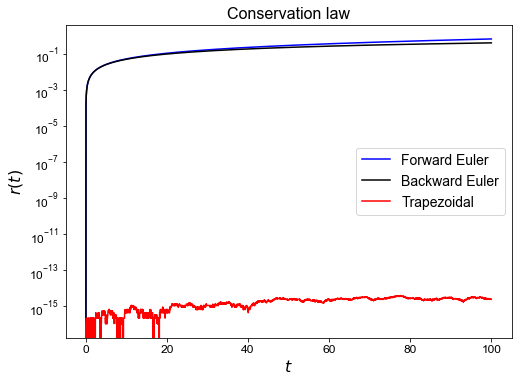

In [8]:
# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
fig.tight_layout(w_pad=4)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$r(t)$', fontsize=16)
ax1.set_title('Conservation law', fontsize=16)

def f(t, y): 
    '''
    function to return RHS of coupled ODEs
    '''
    f = np.zeros_like(y)
    f[0] = -y[1]
    f[1] =  y[0]   
    return f

# plotting the three solution to confirm confirmation to coservation law.
y, t = forward_euler(f, y0, t0, tf, dt)
ax1.semilogy(t, np.abs(np.sqrt(y[:,0]**2 + y[:,1]**2) - np.sqrt(y[0,0]**2 + y[0,1]**2)), 'b', label='Forward Euler')

t, y = backward_euler(f, y0, t0, tf, dt)
ax1.semilogy(t, np.abs(np.sqrt(y[:,0]**2 + y[:,1]**2) - np.sqrt(y[0,0]**2 + y[0,1]**2)), 'k', label='Backward Euler')

t, y = Trapezoidal(f, y0, t0, tf, dt)
ax1.semilogy(t, np.abs(np.sqrt(y[:,0]**2 + y[:,1]**2) - np.sqrt(y[0,0]**2 + y[0,1]**2)), 'r', label='Trapezoidal')

ax1.legend(loc='best', fontsize=14);

##  Comment

- Trapezoidal/AM1 method was chosen as the implicit two-level scheme to be implemented


- Using the conservation law to check for accuracy, it is glaring that the Trapezoidal/AM1 method did the best job. Even as we experienced some undershoots, it was the closest to maintaining the value of exact solution at r(0)

## Lesson learnt from coursework.

-  Improvement in plotting skills using the matplotlib package.

-  Got more understanding on how some of the schemes work better, their advantages and disadvantages.

-  Better general understanding of the ACSE 3 course and it's application.

-  Improvement in time management skills

## Challenges

- Inability to understand some questions clearly.